In [128]:
# Common python libraries
import os
import pickle

# Data manipulation libraries
import numpy as np
import pandas as pd
import copy

# plotting libraries
import matplotlib.pyplot as plt
import random #this will be used to generate color
import seaborn as sns


# Preprocessing libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

# sklearn libraries
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import classification_report, f1_score

#Machine learning libraries
from sklearn.ensemble import RandomForestClassifier

from xgboost import XGBClassifier
import xgboost as xgb

# for random forest
from sklearn.model_selection import GridSearchCV

# For a cleaner notebook
from tqdm import tqdm
from IPython.display import clear_output


In [129]:
dataset = pd.read_csv("ObesityDataSet2.csv")
dataset

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,24,1.58,65.29,yes,no,2.03,2.74,Sometimes,no,2.00,no,1.28,1.019,no,Public_Transportation,Overweight_Level_II
1,Male,23,1.65,66.00,no,no,3.00,3.00,Sometimes,no,2.00,no,3.00,0.000,no,Public_Transportation,Normal_Weight
2,Female,21,1.69,51.26,yes,yes,3.00,3.18,Frequently,no,1.91,no,0.48,0.625,no,Public_Transportation,Insufficient_Weight
3,Female,22,1.69,65.00,yes,yes,2.00,3.00,Sometimes,no,2.00,no,1.00,1.000,Sometimes,Public_Transportation,Normal_Weight
4,Female,23,1.61,82.64,yes,yes,2.96,1.00,Sometimes,no,2.98,no,0.74,2.000,Sometimes,Public_Transportation,Obesity_Type_I
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1051,Female,21,1.74,130.93,yes,yes,3.00,3.00,Sometimes,no,1.85,no,1.46,0.962,Sometimes,Public_Transportation,Obesity_Type_III
1052,Female,17,1.54,57.26,no,yes,1.97,2.34,Sometimes,no,1.71,yes,0.10,1.191,Sometimes,Public_Transportation,Overweight_Level_I
1053,Female,19,1.60,45.00,no,no,3.00,3.00,no,no,3.00,yes,2.00,0.000,no,Walking,Insufficient_Weight
1054,Female,25,1.69,113.45,yes,yes,3.00,3.00,Sometimes,no,2.99,no,0.39,0.284,Sometimes,Public_Transportation,Obesity_Type_III


### EDA

In [62]:
# Indentify the data types
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1056 entries, 0 to 1055
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          1056 non-null   object 
 1   Age                             1056 non-null   object 
 2   Height                          1056 non-null   float64
 3   Weight                          1056 non-null   float64
 4   family_history_with_overweight  1056 non-null   object 
 5   FAVC                            1056 non-null   object 
 6   FCVC                            1019 non-null   float64
 7   NCP                             1056 non-null   float64
 8   CAEC                            1056 non-null   object 
 9   SMOKE                           1056 non-null   object 
 10  CH2O                            1056 non-null   float64
 11  SCC                             1056 non-null   object 
 12  FAF                             10

I will change the ***Age*** data types into float84 since we don't want any complicated things later on, 

In [63]:
# Remove 'years' from Age column and convert to float
dataset['Age'] = dataset['Age'].astype(str).str.replace(' years', '').str.strip()
dataset['Age'] = dataset['Age'].astype(float)

Now this supposedly should just get rid of the 'years' in the Age and turn it into float!

In [64]:
# Now we check the data types again
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1056 entries, 0 to 1055
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          1056 non-null   object 
 1   Age                             1056 non-null   float64
 2   Height                          1056 non-null   float64
 3   Weight                          1056 non-null   float64
 4   family_history_with_overweight  1056 non-null   object 
 5   FAVC                            1056 non-null   object 
 6   FCVC                            1019 non-null   float64
 7   NCP                             1056 non-null   float64
 8   CAEC                            1056 non-null   object 
 9   SMOKE                           1056 non-null   object 
 10  CH2O                            1056 non-null   float64
 11  SCC                             1056 non-null   object 
 12  FAF                             10

In [65]:
# Now Checking for duplicates
dataset.duplicated().sum()

10

In [66]:
# Check for missing values
dataset.isna().sum()

Gender                             0
Age                                0
Height                             0
Weight                             0
family_history_with_overweight     0
FAVC                               0
FCVC                              37
NCP                                0
CAEC                               0
SMOKE                              0
CH2O                               0
SCC                                0
FAF                                0
TUE                                0
CALC                               0
MTRANS                            26
NObeyesdad                         0
dtype: int64

In [67]:
# Calculate percentage of missing values per column
missing_percent = dataset.isna().mean() * 100
print(missing_percent)

Gender                            0.000000
Age                               0.000000
Height                            0.000000
Weight                            0.000000
family_history_with_overweight    0.000000
FAVC                              0.000000
FCVC                              3.503788
NCP                               0.000000
CAEC                              0.000000
SMOKE                             0.000000
CH2O                              0.000000
SCC                               0.000000
FAF                               0.000000
TUE                               0.000000
CALC                              0.000000
MTRANS                            2.462121
NObeyesdad                        0.000000
dtype: float64


Since the missing value percentage is low I will just drop it

In [68]:
# Drop rows with missing values and make the clean dataset into the new dataset
dataset_clean = dataset.dropna()
print(dataset_clean.isna().sum())
dataset = dataset_clean

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64


In [69]:
# Now we drop the duplicates
dataset = dataset.drop_duplicates()

In [70]:
# Check for duplicates again after cleaning
dataset.duplicated().sum()


0

### Splitting data into numeric and categorical

In [71]:
numeric_data = dataset.select_dtypes(include=[np.number])
categorical_data = dataset.select_dtypes(exclude=[np.number])

In [72]:
numeric_data

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
0,24.0,1.58,65.29,2.03,2.74,2.00,1.28,1.019
1,23.0,1.65,66.00,3.00,3.00,2.00,3.00,0.000
2,21.0,1.69,51.26,3.00,3.18,1.91,0.48,0.625
3,22.0,1.69,65.00,2.00,3.00,2.00,1.00,1.000
4,23.0,1.61,82.64,2.96,1.00,2.98,0.74,2.000
...,...,...,...,...,...,...,...,...
1051,21.0,1.74,130.93,3.00,3.00,1.85,1.46,0.962
1052,17.0,1.54,57.26,1.97,2.34,1.71,0.10,1.191
1053,19.0,1.60,45.00,3.00,3.00,3.00,2.00,0.000
1054,25.0,1.69,113.45,3.00,3.00,2.99,0.39,0.284


In [73]:
categorical_data


,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,NObeyesdad
0,Female,yes,no,Sometimes,no,no,no,Public_Transportation,Overweight_Level_II
1,Male,no,no,Sometimes,no,no,no,Public_Transportation,Normal_Weight
2,Female,yes,yes,Frequently,no,no,no,Public_Transportation,Insufficient_Weight
3,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Normal_Weight
4,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_I
...,...,...,...,...,...,...,...,...,...
1051,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_III
1052,Female,no,yes,Sometimes,no,yes,Sometimes,Public_Transportation,Overweight_Level_I
1053,Female,no,no,no,no,yes,no,Walking,Insufficient_Weight
1054,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_III


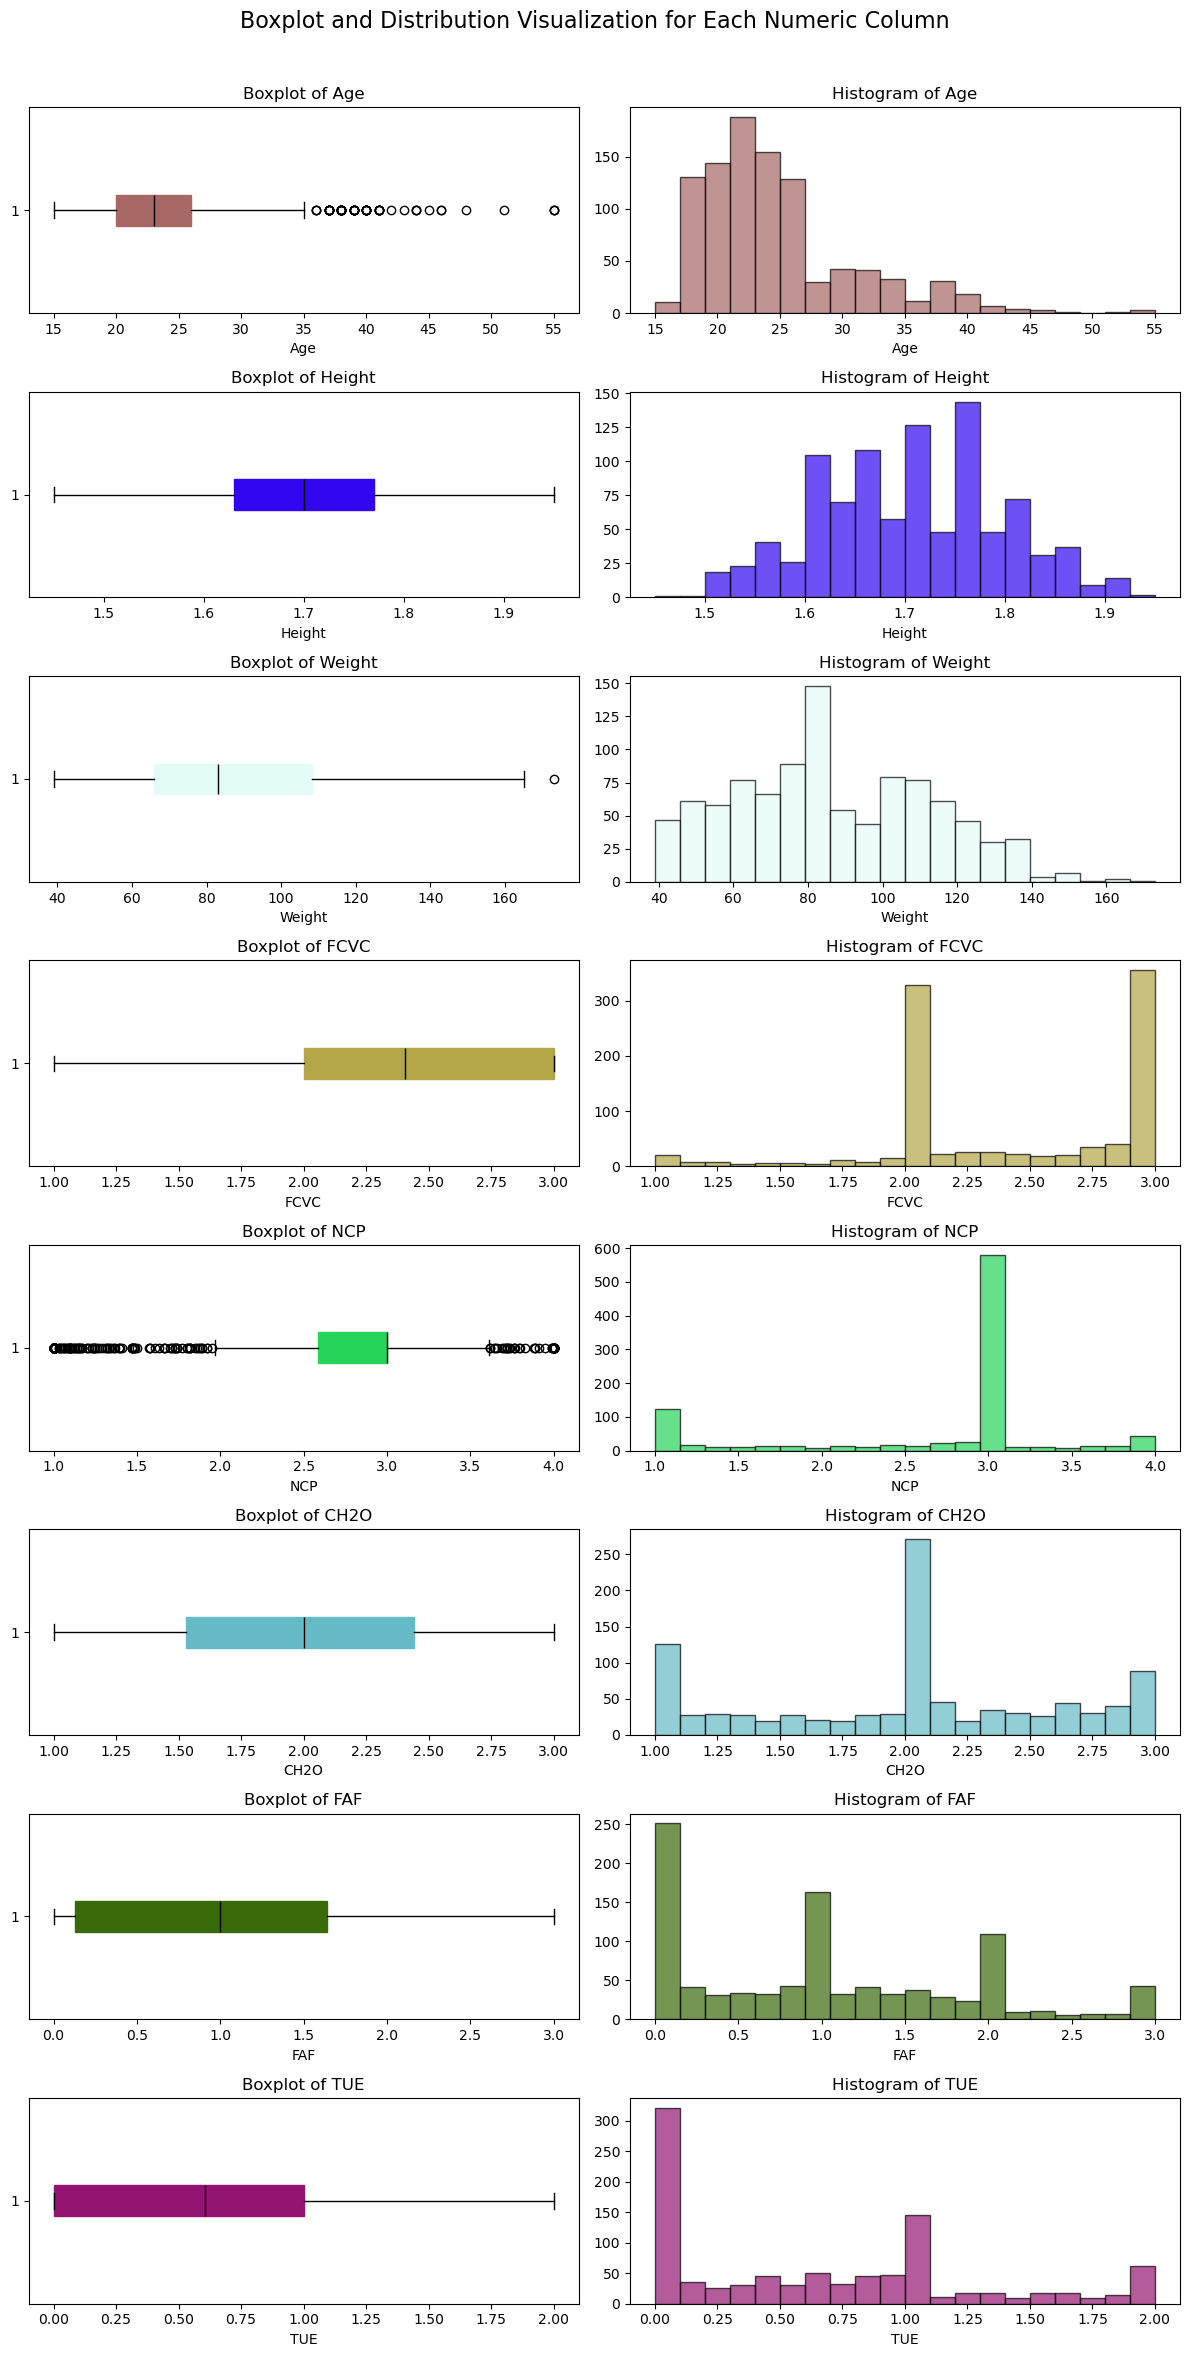

In [74]:
#### Plotting the distribution of numeric data
fig_titles = []

for colName in numeric_data.columns:
    fig_titles.append(f"Boxplot Of {colName}")
    fig_titles.append(f"Histogram Of {colName}")
    
#setting the colors for each column
def fill_color_generator():
    r = random.randint(0, 255)
    g = random.randint(0, 255)
    b = random.randint(0, 255)
    return (r/255, g/255, b/255)

fill_color_dict = {}
for colName in numeric_data.columns:
    fill_color_dict[colName] = fill_color_generator()

# make subplot for each column name
num_rows = len(numeric_data.columns)
fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(12, num_rows * 3))

# Flatten axes for easier indexing when there's more than 1 row
axes = axes if num_rows > 1 else [axes]

for i, column in enumerate(numeric_data.columns):
    color = fill_color_dict[column]

    # Boxplot
    axes[i][0].boxplot(numeric_data[column].dropna(), vert=False, patch_artist=True,
                        boxprops=dict(facecolor=color, color=color),
                        medianprops=dict(color="black"))
    axes[i][0].set_title(f"Boxplot of {column}")
    axes[i][0].set_xlabel(column)

    # Histogram
    axes[i][1].hist(numeric_data[column].dropna(), bins=20, color=color, alpha=0.7, edgecolor='black')
    axes[i][1].set_title(f"Histogram of {column}")
    axes[i][1].set_xlabel(column)

# Overall layout
fig.suptitle("Boxplot and Distribution Visualization for Each Numeric Column", fontsize=16)
fig.tight_layout(rect=[0, 0, 1, 0.97])  # Adjust layout to fit title
plt.show()

There are some outliers ini NCP, Weight, Age, and Height. But most of the outliers seem reasonable, like in the Height and Weight which is the average of a person usually. The distributioin of FCVC, NCP, FAF, and TUE are skewed and might lead to a bad performance in the model since the skewed data might bring bias.

Side note: **Age** would be scaled using robust scaler since the robust scatler is more resilient towards outliers

In [75]:
# Plotting the distribution of categorical data
categorical_data

,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,NObeyesdad
0,Female,yes,no,Sometimes,no,no,no,Public_Transportation,Overweight_Level_II
1,Male,no,no,Sometimes,no,no,no,Public_Transportation,Normal_Weight
2,Female,yes,yes,Frequently,no,no,no,Public_Transportation,Insufficient_Weight
3,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Normal_Weight
4,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_I
...,...,...,...,...,...,...,...,...,...
1051,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_III
1052,Female,no,yes,Sometimes,no,yes,Sometimes,Public_Transportation,Overweight_Level_I
1053,Female,no,no,no,no,yes,no,Walking,Insufficient_Weight
1054,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_III


In [76]:
# I will change the "Nobeyesdad" column to "Y" since we will predict y
categorical_data.rename(columns = {'NObeyesdad':'y'}, inplace = True)
categorical_data

,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,y
0,Female,yes,no,Sometimes,no,no,no,Public_Transportation,Overweight_Level_II
1,Male,no,no,Sometimes,no,no,no,Public_Transportation,Normal_Weight
2,Female,yes,yes,Frequently,no,no,no,Public_Transportation,Insufficient_Weight
3,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Normal_Weight
4,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_I
...,...,...,...,...,...,...,...,...,...
1051,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_III
1052,Female,no,yes,Sometimes,no,yes,Sometimes,Public_Transportation,Overweight_Level_I
1053,Female,no,no,no,no,yes,no,Walking,Insufficient_Weight
1054,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_III


In [77]:
# Now we see the unique values in each column
for col in categorical_data.columns:        
    print(f"Unique values in {col}: {categorical_data[col].unique()}")

Unique values in Gender: ['Female' 'Male']
Unique values in family_history_with_overweight: ['yes' 'no']
Unique values in FAVC: ['no' 'yes']
Unique values in CAEC: ['Sometimes' 'Frequently' 'no' 'Always']
Unique values in SMOKE: ['no' 'yes']
Unique values in SCC: ['no' 'yes']
Unique values in CALC: ['no' 'Sometimes' 'Frequently' 'Always']
Unique values in MTRANS: ['Public_Transportation' 'Bike' 'Automobile' 'Motorbike' 'Walking']
Unique values in y: ['Overweight_Level_II' 'Normal_Weight' 'Insufficient_Weight'
 'Obesity_Type_I' 'Obesity_Type_III' 'Overweight_Level_I'
 'Obesity_Type_II']


In [78]:
# Now we will count the number of unique values in each categorical column
# and create a new DataFrame with the counts
categorical_count = []

for col in categorical_data.columns:
    counts = categorical_data[col].value_counts().reset_index()
    counts.columns = [f"{col}_values", f"{col}_count"]  #Rename column names
    counts[f"{col}_values"] = counts[f"{col}_values"].astype(str)  #Make sure it is string
    
    categorical_count.append(counts)
    
count_result = pd.concat(categorical_count, ignore_index=True)
count_result

,Gender_values,Gender_count,family_history_with_overweight_values,family_history_with_overweight_count,FAVC_values,FAVC_count,CAEC_values,CAEC_count,SMOKE_values,SMOKE_count,SCC_values,SCC_count,CALC_values,CALC_count,MTRANS_values,MTRANS_count,y_values,y_count
0,Male,497.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,487.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,yes,811.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,no,173.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,yes,870.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,no,114.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,Sometimes,814.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,Frequently,123.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,Always,27.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,no,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


It has many NaN, but the NaN is not something of use in the plot later on. So we will just ignore it.

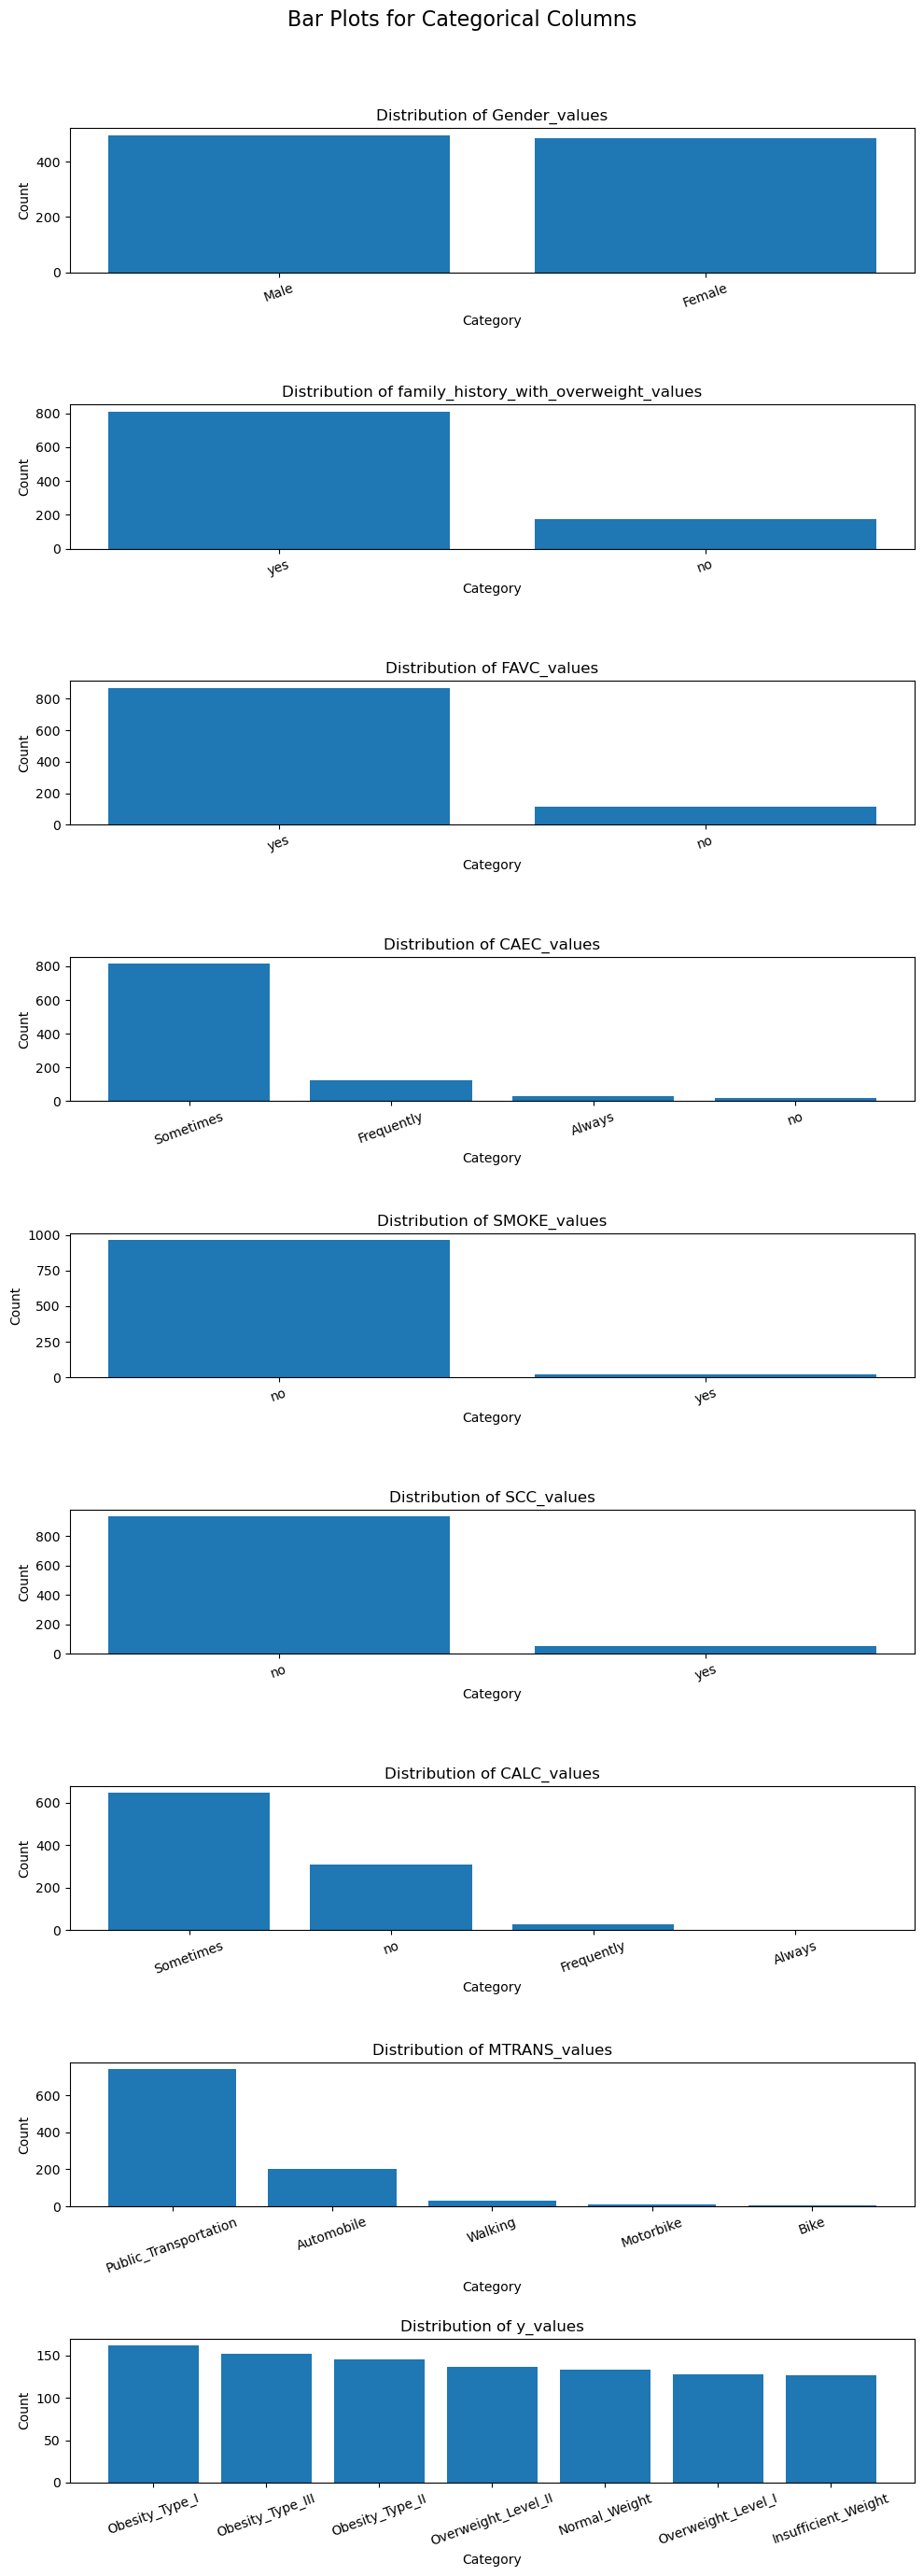

In [79]:
# Now we plot
cat_fig_titles = []

for col in count_result.columns:
    if "_values" in col:
        cat_fig_titles.append(f"Distribution of {col}")
        
categoric_columns = [col for col in count_result.columns if "_values" in col]

# Create subplots: one row for each categorical column
num_rows = len(categoric_columns)
fig, axes = plt.subplots(nrows=num_rows, ncols=1, figsize=(10, num_rows * 3), sharex=False)

# Flatten axes for easier handling if there's more than 1 row
axes = axes if num_rows > 1 else [axes]

# Plot each categorical distribution
for i, col in enumerate(categoric_columns):
    category_val = count_result[col].to_list()  # Get categorical values
    count = count_result[col.replace("_values", "_count")].to_numpy()  # Get count values
    
    #convert to string
    category_val = [str(val) for val in category_val]
    
    # Select the corresponding subplot axis
    ax = axes[i]
    
    # # Create the bar plot
    ax.bar(category_val, count)
    
    # Set title and labels
    ax.set_title(cat_fig_titles[i], fontsize=12)
    ax.set_ylabel("Count")
    ax.set_xlabel("Category")
    
    # Rotate x-axis labels for better readability
    ax.tick_params(axis='x', rotation=20)

# Add an overall title and adjust layout
fig.suptitle("Bar Plots for Categorical Columns", fontsize=16, y=1.02)
fig.tight_layout(h_pad=2.0)  # Adjust spacing between rows
plt.show()

It's nice to see that ***Gender*** and ***y_values*** is distributed uniformly, as for the rest not so much.

### Correlation Test

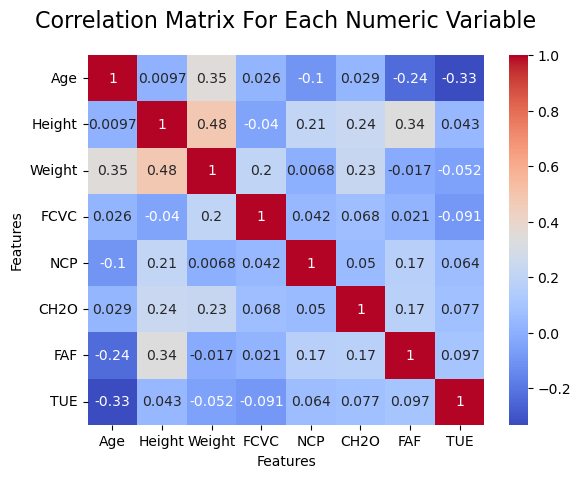

In [80]:
#Spearman correlation test will be used because the data is not distributed normally
#and the data is verry skewed based on the distribution plot

#Pearson is not used because pearsons method assumes the data is distributed normally
#Pearson is for measuring linear association strength
correlation_matrix = numeric_data.corr('spearman')

cor_plot = sns.heatmap(correlation_matrix, annot = True, cmap= "coolwarm")
plt.title("Correlation Matrix For Each Numeric Variable", fontsize = 16, pad = 20)
plt.xlabel("Features")
plt.ylabel("Features")
plt.show()

All the numeric data shows little to no correlation which is good so that there will be no bias due to correlation to our model.

### Data Preprocessing

In [81]:
# Encoding categorical data
for col in categorical_data.columns:
    print(f"{col}: {categorical_data[col].unique()} \n \n")

Gender: ['Female' 'Male'] 
 

family_history_with_overweight: ['yes' 'no'] 
 

FAVC: ['no' 'yes'] 
 

CAEC: ['Sometimes' 'Frequently' 'no' 'Always'] 
 

SMOKE: ['no' 'yes'] 
 

SCC: ['no' 'yes'] 
 

CALC: ['no' 'Sometimes' 'Frequently' 'Always'] 
 

MTRANS: ['Public_Transportation' 'Bike' 'Automobile' 'Motorbike' 'Walking'] 
 

y: ['Overweight_Level_II' 'Normal_Weight' 'Insufficient_Weight'
 'Obesity_Type_I' 'Obesity_Type_III' 'Overweight_Level_I'
 'Obesity_Type_II'] 
 



For Encoder I will use 2:
- One Hot Encoder: **MTRANS**, **Gender**
- Ordinal Encoder: **CALC**, **CAEC**, **Y**
- Binary Encoder: **family_history_with_overweight**, **FAVC**, **SMOKE**, **SCC**

In [82]:
#encoding libraries

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

#### Binary Encoding

In [83]:
nominal_cols = ["MTRANS", "Gender"]
ordinal_cols = ["CALC", "CAEC", "y"]
bin_cols = ["family_history_with_overweight", "FAVC", "SMOKE", "SCC"]

In [84]:
bin_enc = LabelEncoder()
binary_data = categorical_data[bin_cols]
binary_data

,family_history_with_overweight,FAVC,SMOKE,SCC
0,yes,no,no,no
1,no,no,no,no
2,yes,yes,no,no
3,yes,yes,no,no
4,yes,yes,no,no
...,...,...,...,...
1051,yes,yes,no,no
1052,no,yes,no,yes
1053,no,no,no,yes
1054,yes,yes,no,no


In [85]:
#binary encode
bin_data_enc = binary_data.apply(bin_enc.fit_transform)
bin_data_enc

,family_history_with_overweight,FAVC,SMOKE,SCC
0,1,0,0,0
1,0,0,0,0
2,1,1,0,0
3,1,1,0,0
4,1,1,0,0
...,...,...,...,...
1051,1,1,0,0
1052,0,1,0,1
1053,0,0,0,1
1054,1,1,0,0


#### One hot Encoding

In [86]:
hot_enc = OneHotEncoder(sparse_output=False).set_output(transform="pandas")

nominal_cols_enc = hot_enc.fit_transform(categorical_data[nominal_cols])



#### Ordinal Encoding

In [87]:
for cols in categorical_data[ordinal_cols].columns:
    print(f"{cols}: {categorical_data[cols].unique()}\n")

CALC: ['no' 'Sometimes' 'Frequently' 'Always']

CAEC: ['Sometimes' 'Frequently' 'no' 'Always']

y: ['Overweight_Level_II' 'Normal_Weight' 'Insufficient_Weight'
 'Obesity_Type_I' 'Obesity_Type_III' 'Overweight_Level_I'
 'Obesity_Type_II']



In [88]:
ord_enc_y = OrdinalEncoder(categories=[['Insufficient_Weight','Normal_Weight','Overweight_Level_I','Overweight_Level_II',
                                        'Obesity_Type_I','Obesity_Type_II','Obesity_Type_III']]).set_output(transform="pandas")

ord_enc_calc_caec = OrdinalEncoder(categories = [["no", "Sometimes", "Frequently", "Always"]]).set_output(transform="pandas")

In [89]:
y_enc = ord_enc_y.fit_transform(categorical_data[['y']])
y_enc

,y
0,3.0
1,1.0
2,0.0
3,1.0
4,4.0
...,...
1051,6.0
1052,2.0
1053,0.0
1054,6.0


In [90]:
CALC_enc = ord_enc_calc_caec.fit_transform(categorical_data[["CALC"]])
CAEC_enc = ord_enc_calc_caec.fit_transform(categorical_data[["CAEC"]])

#### Mashing back all the categorical data while still encoding the numerical data 

In [91]:
categorical_data_enc = pd.concat([bin_data_enc,nominal_cols_enc,CALC_enc, CAEC_enc, y_enc], axis = 1)


#### Now we mash all the data together

In [92]:
Encoded_dataset = pd.concat([numeric_data, categorical_data_enc], axis = 1)
Encoded_dataset.head()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,family_history_with_overweight,FAVC,...,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,Gender_Female,Gender_Male,CALC,CAEC,y
0,24.0,1.58,65.29,2.03,2.74,2.00,1.28,1.019,1,0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,3.0
1,23.0,1.65,66.00,3.00,3.00,2.00,3.00,0.000,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0
2,21.0,1.69,51.26,3.00,3.18,1.91,0.48,0.625,1,1,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,2.0,0.0
3,22.0,1.69,65.00,2.00,3.00,2.00,1.00,1.000,1,1,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0
4,23.0,1.61,82.64,2.96,1.00,2.98,0.74,2.000,1,1,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,4.0


### Splitting data to train and test

In [93]:
# Taking out the y column from the dataset
x = Encoded_dataset.drop(columns=["y"])

In [94]:
# Splitting the dataset into training and testing sets
x_train,x_test,y_train,y_test = train_test_split(x, 
                                                y_enc, 
                                                test_size= 0.2, 
                                                random_state= 42 #for reproducibility
                                                )

#### Scaling the train data

In [95]:
age_scaler = RobustScaler()
weight_scaler = StandardScaler()

In [96]:
x_train["Age"] = age_scaler.fit_transform(x_train[["Age"]])
x_train["Weight"] = weight_scaler.fit_transform(x_train[["Weight"]])

In [97]:
x_train.head()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,family_history_with_overweight,FAVC,...,SCC,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,Gender_Female,Gender_Male,CALC,CAEC
1034,2.333333,1.76,1.211312,2.14,2.99,1.89,0.62,0.0,1,1,...,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
826,-0.166667,1.85,1.360053,3.00,2.22,1.34,0.43,0.0,1,1,...,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0
369,-0.666667,1.51,-1.566707,2.00,4.00,1.00,3.00,0.0,0,1,...,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0
957,0.666667,1.83,0.477067,3.00,1.00,2.00,2.00,1.0,1,1,...,0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,2.0
576,-0.500000,1.68,-1.411153,2.72,3.00,2.00,1.86,1.0,0,0,...,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0


#### Scaling the test data

In [98]:
x_test["Age"] = age_scaler.transform(x_test[["Age"]])
x_test["Weight"] = weight_scaler.transform(x_test[["Weight"]])

x_test.head()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,family_history_with_overweight,FAVC,...,SCC,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,Gender_Female,Gender_Male,CALC,CAEC
666,-0.166667,1.79,0.136438,1.90,2.61,1.20,0.00,1.895,1,1,...,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0
494,-0.666667,1.54,-1.680250,3.00,1.00,2.00,0.00,1.000,0,1,...,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
792,0.333333,1.77,1.014883,1.46,3.00,2.02,1.56,0.001,1,1,...,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0
478,0.500000,1.77,1.054244,2.18,3.00,2.13,1.31,0.079,1,1,...,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0
305,2.166667,1.69,-0.116006,2.00,1.01,2.14,1.06,0.000,1,1,...,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


### Creating the model

#### Model Random Forest

In [99]:
#Grid search setup
rf_grid = RandomForestClassifier()
gr_space = {
    'max_depth': [3,5,7,10,20,30],
    'n_estimators': [100, 200, 300, 400, 500],
    'max_features': [10, 20, 30 , 40],
    'min_samples_leaf': [1, 2, 4]
}

rf_model_grid = GridSearchCV(rf_grid,
                            gr_space,
                            cv = 3,
                            scoring='f1_macro',
                            verbose = 3,
                            n_jobs=-1 #all cores
                            )

In [100]:
rf_model_result = rf_model_grid.fit(x_train, y_train)

Fitting 3 folds for each of 360 candidates, totalling 1080 fits


c:\Users\k\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [101]:
rf_best_params = rf_model_result.best_params_
print("Grid search result for optimal parameters: ")
for param in sorted(rf_best_params.keys()):
    print(f"{param}: {rf_best_params[param]}")

Grid search result for optimal parameters: 
max_depth: 30
max_features: 10
min_samples_leaf: 1
n_estimators: 500


because the model has been runned a few times now, rather than using the newest optimal parameters, we will use the first optimal parameters

In [102]:
# Retrain with the optimal parameters
best_rf_model = RandomForestClassifier(max_depth= 10,
                                       max_features=10,
                                       min_samples_leaf=1,
                                       n_estimators=100
                                       )

In [103]:
best_rf_model.fit(x_train,y_train)

c:\Users\k\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(max_depth=10, max_features=10)

#### Test model

In [104]:
rf_prediction = best_rf_model.predict(x_test)

In [109]:
rf_predicted = ord_enc_y.inverse_transform(rf_prediction.reshape(-1,1)).ravel()
actual_class = ord_enc_y.inverse_transform(y_test.values.reshape(-1,1)).ravel()

class_names = sorted(pd.unique(actual_class))

In [110]:
rf_classification_report=classification_report(y_test, rf_prediction, target_names=class_names)

print(rf_classification_report)

                     precision    recall  f1-score   support

Insufficient_Weight       0.96      0.96      0.96        23
      Normal_Weight       0.76      0.79      0.78        24
     Obesity_Type_I       0.76      0.76      0.76        21
    Obesity_Type_II       0.89      0.85      0.87        40
   Obesity_Type_III       0.83      0.93      0.88        27
 Overweight_Level_I       1.00      0.93      0.97        30
Overweight_Level_II       1.00      1.00      1.00        32

           accuracy                           0.89       197
          macro avg       0.89      0.89      0.89       197
       weighted avg       0.90      0.89      0.89       197



#### Confusion Matrix

In [112]:
rf_predicted = ord_enc_y.inverse_transform(rf_prediction.reshape(-1,1)).ravel()
actual_class = ord_enc_y.inverse_transform(y_test.values.reshape(-1,1)).ravel()

class_names = sorted(pd.unique(actual_class))

In [113]:
rf_cm = pd.DataFrame(confusion_matrix(actual_class,
                         rf_predicted,
                         labels=class_names))
rf_cm

,0,1,2,3,4,5,6
0,22,1,0,0,0,0,0
1,1,19,0,0,0,3,1
2,0,0,25,0,0,1,1
3,0,0,2,28,0,0,0
4,0,0,0,0,32,0,0
5,0,3,0,0,0,16,2
6,0,2,3,0,0,1,34


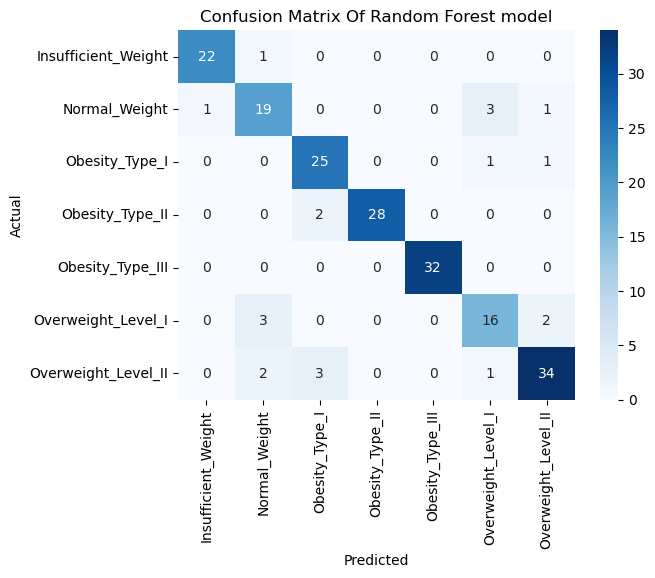

In [114]:
sns.heatmap(
    rf_cm,
    cmap= "Blues",
    annot= True,
    fmt= "g",
    xticklabels=class_names,
    yticklabels=class_names
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Of Random Forest model")

plt.show()

### XGBoost

In [115]:
def tune_hyperparameters(X_train, y_train, task_type='classification'):
    """Perform hyperparameter tuning using GridSearchCV"""
    print(f"\n=== Hyperparameter Tuning for {task_type} ===")
    
    if task_type == 'classification':
        model = xgb.XGBClassifier(random_state=42)
    else:
        model = xgb.XGBRegressor(random_state=42)
    
    # Define parameter grid
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 4, 6],
        'learning_rate': [0.01, 0.1, 0.2],
        'subsample': [0.8, 0.9, 1.0]
    }
    
    # Perform grid search
    grid_search = GridSearchCV(
        model, 
        param_grid, 
        cv=3, 
        scoring='accuracy' if task_type == 'classification' else 'neg_mean_squared_error',
        n_jobs=-1,
        verbose=1
    )
    
    grid_search.fit(X_train, y_train)
    
    print(f"Best parameters: {grid_search.best_params_}")
    print(f"Best score: {grid_search.best_score_:.4f}")
    
    return grid_search.best_estimator_

In [116]:
def create_classification_example():
    """Create and train XGBoost classifier with sample data"""
    print("=== XGBoost Classification Example ===")
    
    # Generate sample data (replace with your actual data)
    np.random.seed(42)
    n_samples = 1000
    X = np.random.randn(n_samples, 4)  # 4 features
    y = (X[:, 0] + X[:, 1] - X[:, 2] + np.random.randn(n_samples) * 0.1 > 0).astype(int)
    
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Create XGBoost classifier
    model = xgb.XGBClassifier(
        objective='binary:logistic',
        n_estimators=100,
        max_depth=6,
        learning_rate=0.1,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42
    )
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)
    
    # Evaluate
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    # Feature importance
    feature_importance = model.feature_importances_
    print(f"\nFeature Importance: {feature_importance}")
    
    return model

# Example 2: Regression with sample data
def create_regression_example():
    """Create and train XGBoost regressor with sample data"""
    print("\n=== XGBoost Regression Example ===")
    
    # Generate sample data
    np.random.seed(42)
    n_samples = 1000
    X = np.random.randn(n_samples, 3)
    y = X[:, 0] * 2 + X[:, 1] * 1.5 - X[:, 2] + np.random.randn(n_samples) * 0.1
    
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Create XGBoost regressor
    model = xgb.XGBRegressor(
        objective='reg:squarederror',
        n_estimators=100,
        max_depth=6,
        learning_rate=0.1,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42
    )
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Evaluate
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    print(f"RMSE: {rmse:.4f}")
    
    return model

# Example 3: Working with real dataset (using pandas)
def load_and_prepare_data(file_path=None):
    """Load and prepare your dataset"""
    if file_path:
        # Load your data
        df = pd.read_csv(file_path)
    else:
        # Example with built-in dataset simulation
        print("Using simulated dataset...")
        np.random.seed(42)
        df = pd.DataFrame({
            'feature1': np.random.randn(1000),
            'feature2': np.random.randn(1000),
            'feature3': np.random.choice(['A', 'B', 'C'], 1000),
            'feature4': np.random.uniform(0, 100, 1000),
            'target': np.random.choice([0, 1], 1000)
        })
    
    # Handle categorical variables
    le = LabelEncoder()
    categorical_columns = df.select_dtypes(include=['object']).columns
    
    for col in categorical_columns:
        if col != 'target':  # Don't encode target if it's categorical but you want to keep it as is
            df[col] = le.fit_transform(df[col])
    
    return df

# Example 4: Hyperparameter tuning
def tune_hyperparameters(X_train, y_train, task_type='classification'):
    """Perform hyperparameter tuning using GridSearchCV"""
    print(f"\n=== Hyperparameter Tuning for {task_type} ===")
    
    if task_type == 'classification':
        model = xgb.XGBClassifier(random_state=42)
    else:
        model = xgb.XGBRegressor(random_state=42)
    
    # Define parameter grid
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 4, 6],
        'learning_rate': [0.01, 0.1, 0.2],
        'subsample': [0.8, 0.9, 1.0]
    }
    
    # Perform grid search
    grid_search = GridSearchCV(
        model, 
        param_grid, 
        cv=3, 
        scoring='accuracy' if task_type == 'classification' else 'neg_mean_squared_error',
        n_jobs=-1,
        verbose=1
    )
    
    grid_search.fit(X_train, y_train)
    
    print(f"Best parameters: {grid_search.best_params_}")
    print(f"Best score: {grid_search.best_score_:.4f}")
    
    return grid_search.best_estimator_

# Main execution - Using your pre-split data
if __name__ == "__main__":
    # Since you already have your data split, use it directly:
    # Assuming your variables are: X_train, X_test, y_train, y_test
    
    print("=== Training XGBoost with Your Data ===")
    
    # Check number of unique classes
    n_classes = len(np.unique(y_train))
    print(f"Number of classes detected: {n_classes}")
    
    # Create XGBoost classifier - configured for multi-class
    if n_classes == 2:
        # Binary classification
        model = xgb.XGBClassifier(
            objective='binary:logistic',
            n_estimators=100,
            max_depth=6,
            learning_rate=0.1,
            subsample=0.8,
            colsample_bytree=0.8,
            random_state=42,
            eval_metric='logloss'
        )
    else:
        # Multi-class classification
        model = xgb.XGBClassifier(
            objective='multi:softprob',  # For multi-class
            n_estimators=100,
            max_depth=6,
            learning_rate=0.1,
            subsample=0.8,
            colsample_bytree=0.8,
            random_state=42,
            eval_metric='mlogloss',  # Multi-class log loss
            num_class=n_classes  # Specify number of classes
        )
    
    # Train the model with your data
    print("Training model...")
    model.fit(
        x_train, y_train,
        eval_set=[(x_train, y_train), (x_test, y_test)],
        verbose=True  # Shows training progress
    )
    from sklearn.metrics import accuracy_score

    # Make predictions
    print("\nMaking predictions...")
    y_pred = model.predict(x_test)
    y_pred_proba = model.predict_proba(x_test)  # Probability predictions
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\nModel Performance:")
    print(f"Accuracy: {accuracy:.4f}")
    print("\nDetailed Classification Report:")
    print(classification_report(y_test, y_pred))

    # Feature importance
    print(f"\nTop 10 Most Important Features:")
    feature_importance = model.feature_importances_
    if hasattr(x_train, 'columns'):
        # If using pandas DataFrame
        feature_names = x_train.columns
        importance_df = pd.DataFrame({
            'feature': feature_names,
            'importance': feature_importance
        }).sort_values('importance', ascending=False)
        print(importance_df.head(10))
    else:
        # If using numpy arrays
        indices = np.argsort(feature_importance)[::-1]
        print("Feature ranking:")
        for i in range(min(10, len(feature_importance))):
            print(f"{i+1}. Feature {indices[i]}: {feature_importance[indices[i]]:.4f}")

=== Training XGBoost with Your Data ===
Number of classes detected: 7
Training model...
[0]	validation_0-mlogloss:1.72807	validation_1-mlogloss:1.75231
[1]	validation_0-mlogloss:1.53885	validation_1-mlogloss:1.57743
[2]	validation_0-mlogloss:1.40249	validation_1-mlogloss:1.45098
[3]	validation_0-mlogloss:1.27291	validation_1-mlogloss:1.34571
[4]	validation_0-mlogloss:1.15569	validation_1-mlogloss:1.23715
[5]	validation_0-mlogloss:1.06426	validation_1-mlogloss:1.15517
[6]	validation_0-mlogloss:0.97365	validation_1-mlogloss:1.07211
[7]	validation_0-mlogloss:0.90310	validation_1-mlogloss:1.01462
[8]	validation_0-mlogloss:0.82982	validation_1-mlogloss:0.94750
[9]	validation_0-mlogloss:0.76415	validation_1-mlogloss:0.88490
[10]	validation_0-mlogloss:0.70253	validation_1-mlogloss:0.83064
[11]	validation_0-mlogloss:0.64955	validation_1-mlogloss:0.78046
[12]	validation_0-mlogloss:0.60469	validation_1-mlogloss:0.73804
[13]	validation_0-mlogloss:0.56513	validation_1-mlogloss:0.70509
[14]	validat

### Comparing the 2 models

In [117]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix, roc_auc_score,
    roc_curve, precision_recall_curve
)

In [118]:
# XGBoost vs Random Forest Model Comparison
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix, roc_auc_score,
    roc_curve, precision_recall_curve
)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
import time
import warnings
warnings.filterwarnings('ignore')

def compare_models_with_tuning(x_train, x_test, y_train, y_test, tune_xgboost=True):
    print("=== MODEL COMPARISON: XGBoost vs Random Forest ===\n")
    
    # Detect number of classes
    n_classes = len(np.unique(y_train))
    print(f"Number of classes: {n_classes}")
    print(f"Class distribution in training set:")
    unique, counts = np.unique(y_train, return_counts=True)
    for cls, count in zip(unique, counts):
        print(f"  Class {cls}: {count} samples ({count/len(y_train)*100:.1f}%)")
    print()
    
    # Initialize models
    models = {}
    predictions = {}
    probabilities = {}
    training_times = {}
    
    # 1. XGBoost Model (with optional hyperparameter tuning)
    if tune_xgboost:
        print("Training XGBoost with hyperparameter tuning...")
        start_time = time.time()
        
        # Define parameter grid for tuning
        if n_classes == 2:
            base_model = xgb.XGBClassifier(
                objective='binary:logistic',
                random_state=42,
                eval_metric='logloss'
            )
        else:
            base_model = xgb.XGBClassifier(
                objective='multi:softprob',
                random_state=42,
                eval_metric='mlogloss',
                num_class=n_classes
            )
        
        # Simplified parameter grid for faster tuning
        param_grid = {
            'n_estimators': [50, 100, 200],
            'max_depth': [3, 6, 10],
            'learning_rate': [0.01, 0.1, 0.2],
            'subsample': [0.8, 1.0]
        }
        
        from sklearn.model_selection import GridSearchCV
        grid_search = GridSearchCV(
            base_model, 
            param_grid, 
            cv=3, 
            scoring='accuracy',
            n_jobs=-1,
            verbose=1
        )
        
        grid_search.fit(x_train, y_train)
        xgb_model = grid_search.best_estimator_
        
        print(f"Best XGBoost parameters: {grid_search.best_params_}")
        print(f"Best XGBoost CV score: {grid_search.best_score_:.4f}")
        
    else:
        print("Training XGBoost with default parameters...")
        start_time = time.time()
        
        if n_classes == 2:
            xgb_model = xgb.XGBClassifier(
                objective='binary:logistic',
                n_estimators=100,
                max_depth=6,
                learning_rate=0.1,
                subsample=0.8,
                colsample_bytree=0.8,
                random_state=42,
                eval_metric='logloss'
            )
        else:
            xgb_model = xgb.XGBClassifier(
                objective='multi:softprob',
                n_estimators=100,
                max_depth=6,
                learning_rate=0.1,
                subsample=0.8,
                colsample_bytree=0.8,
                random_state=42,
                eval_metric='mlogloss',
                num_class=n_classes
            )
        
        xgb_model.fit(x_train, y_train)
    
    training_times['XGBoost'] = time.time() - start_time
    models['XGBoost'] = xgb_model
    predictions['XGBoost'] = xgb_model.predict(x_test)
    probabilities['XGBoost'] = xgb_model.predict_proba(x_test)
    
    # 2. Random Forest Model (with your optimal parameters)
    print("Training Random Forest with optimal parameters...")
    start_time = time.time()
    
    rf_model = RandomForestClassifier(
        max_depth=10,
        max_features=10,
        min_samples_leaf=1,
        n_estimators=100,
        random_state=42,
        n_jobs=-1
    )
    
    rf_model.fit(x_train, y_train)
    training_times['Random Forest'] = time.time() - start_time
    models['Random Forest'] = rf_model
    predictions['Random Forest'] = rf_model.predict(x_test)
    probabilities['Random Forest'] = rf_model.predict_proba(x_test)
    
    print("Training completed!\n")
    
    # 3. Performance Comparison
    print("=== PERFORMANCE COMPARISON ===")
    results_df = compare_performance(y_test, predictions, probabilities, n_classes)
    print(results_df.round(4))
    print()
    
    # 4. Training Time Comparison
    print("=== TRAINING TIME COMPARISON ===")
    for model_name, time_taken in training_times.items():
        print(f"{model_name}: {time_taken:.2f} seconds")
    print()
    
    # 5. Feature Importance Comparison
    print("=== FEATURE IMPORTANCE COMPARISON ===")
    plot_feature_importance_comparison(models, x_train)
    
    # 6. Cross-validation comparison
    print("=== CROSS-VALIDATION COMPARISON ===")
    cv_results = cross_validation_comparison(models, x_train, y_train)
    print(cv_results)
    print()
    
    # 7. Confusion Matrix Comparison
    plot_confusion_matrices(y_test, predictions, n_classes)
    
    # 8. ROC Curves (for binary classification)
    if n_classes == 2:
        plot_roc_curves(y_test, probabilities)
    
    # 9. Detailed Classification Reports
    print("=== DETAILED CLASSIFICATION REPORTS ===")
    for model_name, y_pred in predictions.items():
        print(f"\n{model_name} Classification Report:")
        print(classification_report(y_test, y_pred))
    
    return models, results_df

In [119]:
def compare_performance(y_test, predictions, probabilities, n_classes):
    """Calculate and compare performance metrics"""
    metrics = []
    
    for model_name in predictions.keys():
        y_pred = predictions[model_name]
        y_prob = probabilities[model_name]
        
        # Basic metrics
        accuracy = accuracy_score(y_test, y_pred)
        
        # Handle multi-class metrics
        if n_classes > 2:
            precision = precision_score(y_test, y_pred, average='weighted')
            recall = recall_score(y_test, y_pred, average='weighted')
            f1 = f1_score(y_test, y_pred, average='weighted')
            try:
                auc = roc_auc_score(y_test, y_prob, multi_class='ovr', average='weighted')
            except:
                auc = np.nan
        else:
            precision = precision_score(y_test, y_pred)
            recall = recall_score(y_test, y_pred)
            f1 = f1_score(y_test, y_pred)
            auc = roc_auc_score(y_test, y_prob[:, 1])
        
        metrics.append({
            'Model': model_name,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1-Score': f1,
            'AUC': auc
        })
    
    return pd.DataFrame(metrics).set_index('Model')

In [120]:
def cross_validation_comparison(models, X_train, y_train, cv=5):
    """Perform cross-validation comparison"""
    cv_results = {}
    
    for model_name, model in models.items():
        scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')
        cv_results[model_name] = {
            'Mean CV Accuracy': scores.mean(),
            'Std CV Accuracy': scores.std(),
            'CV Scores': scores
        }
    
    cv_df = pd.DataFrame({
        name: [results['Mean CV Accuracy'], results['Std CV Accuracy']] 
        for name, results in cv_results.items()
    }, index=['Mean CV Accuracy', 'Std CV Accuracy'])
    
    return cv_df

In [121]:
def plot_feature_importance_comparison(models, X_train, top_n=15):
    """Plot and compare feature importance"""
    plt.figure(figsize=(15, 8))
    
    for i, (model_name, model) in enumerate(models.items()):
        plt.subplot(1, 2, i+1)
        
        # Get feature importance
        importance = model.feature_importances_
        
        # Get feature names if available
        if hasattr(X_train, 'columns'):
            feature_names = X_train.columns
        else:
            feature_names = [f'Feature_{j}' for j in range(X_train.shape[1])]
        
        # Sort by importance
        indices = np.argsort(importance)[::-1][:top_n]
        
        plt.barh(range(top_n), importance[indices])
        plt.yticks(range(top_n), [feature_names[j] for j in indices])
        plt.xlabel('Feature Importance')
        plt.title(f'{model_name} - Top {top_n} Features')
        plt.gca().invert_yaxis()
    
    plt.tight_layout()
    plt.show()


In [122]:
def plot_confusion_matrices(y_test, predictions, n_classes):
    """Plot confusion matrices for both models"""
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    
    for i, (model_name, y_pred) in enumerate(predictions.items()):
        cm = confusion_matrix(y_test, y_pred)
        
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i])
        axes[i].set_title(f'{model_name} - Confusion Matrix')
        axes[i].set_xlabel('Predicted')
        axes[i].set_ylabel('Actual')
    
    plt.tight_layout()
    plt.show()

In [123]:
def plot_roc_curves(y_test, probabilities):
    """Plot ROC curves for binary classification"""
    plt.figure(figsize=(10, 8))
    
    for model_name, y_prob in probabilities.items():
        fpr, tpr, _ = roc_curve(y_test, y_prob[:, 1])
        auc = roc_auc_score(y_test, y_prob[:, 1])
        
        plt.plot(fpr, tpr, linewidth=2, label=f'{model_name} (AUC = {auc:.3f})')
    
    plt.plot([0, 1], [0, 1], 'k--', linewidth=2, label='Random Classifier')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves Comparison')
    plt.legend(loc="lower right")
    plt.grid(True, alpha=0.3)
    plt.show()

In [124]:
def model_summary(models, results_df, training_times):
    """Provide a summary and recommendation"""
    print("=== MODEL SUMMARY & RECOMMENDATIONS ===")
    
    # Best model by accuracy
    best_accuracy_model = results_df['Accuracy'].idxmax()
    best_accuracy = results_df.loc[best_accuracy_model, 'Accuracy']
    
    print(f" Best Accuracy: {best_accuracy_model} ({best_accuracy:.4f})")
    
    # Best model by F1-score
    best_f1_model = results_df['F1-Score'].idxmax()
    best_f1 = results_df.loc[best_f1_model, 'F1-Score']
    
    print(f" Best F1-Score: {best_f1_model} ({best_f1:.4f})")
    
    # Training time comparison
    fastest_model = min(training_times, key=training_times.get)
    print(f" Fastest Training: {fastest_model} ({training_times[fastest_model]:.2f}s)")

Starting model comparison...
Make sure you have the following variables defined:
- X_train, X_test, y_train, y_test

=== MODEL COMPARISON: XGBoost vs Random Forest ===

Number of classes: 7
Class distribution in training set:
  Class 0.0: 104 samples (13.2%)
  Class 1.0: 109 samples (13.9%)
  Class 2.0: 107 samples (13.6%)
  Class 3.0: 97 samples (12.3%)
  Class 4.0: 135 samples (17.2%)
  Class 5.0: 115 samples (14.6%)
  Class 6.0: 120 samples (15.2%)

Training XGBoost with hyperparameter tuning...
Fitting 3 folds for each of 54 candidates, totalling 162 fits
Best XGBoost parameters: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 200, 'subsample': 0.8}
Best XGBoost CV score: 0.9212
Training Random Forest with optimal parameters...
Training completed!

=== PERFORMANCE COMPARISON ===
               Accuracy  Precision  Recall  F1-Score     AUC
Model                                                       
XGBoost          0.9239     0.9248  0.9239    0.9237  0.9954
Random Forest  

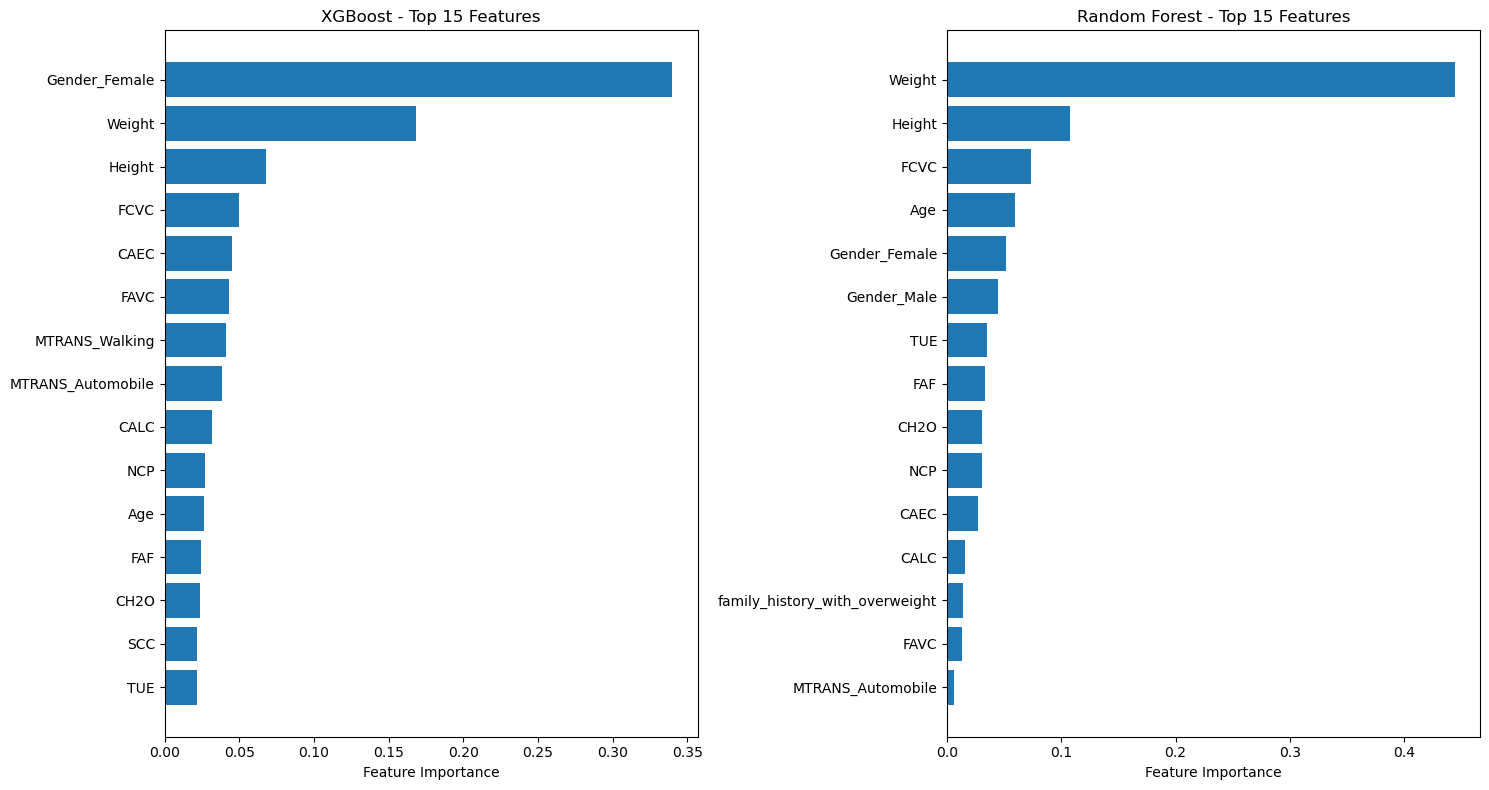

=== CROSS-VALIDATION COMPARISON ===
                   XGBoost  Random Forest
Mean CV Accuracy  0.931371       0.916141
Std CV Accuracy   0.020660       0.017221



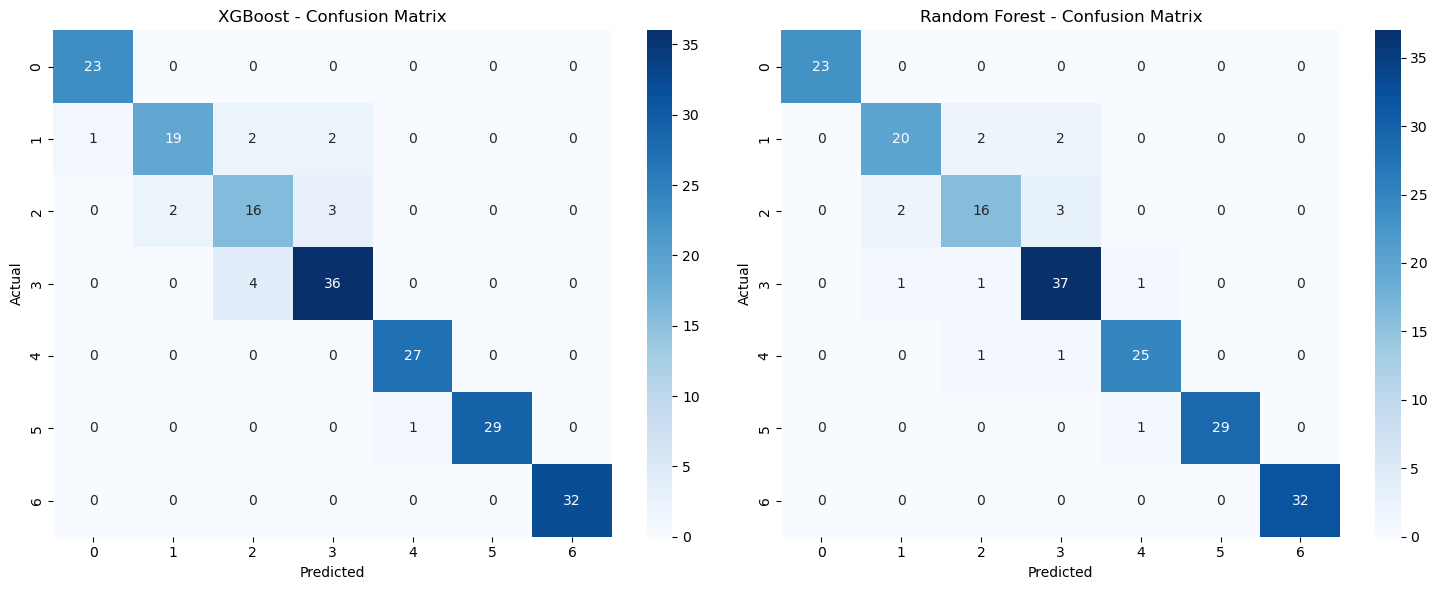

=== DETAILED CLASSIFICATION REPORTS ===

XGBoost Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98        23
         1.0       0.90      0.79      0.84        24
         2.0       0.73      0.76      0.74        21
         3.0       0.88      0.90      0.89        40
         4.0       0.96      1.00      0.98        27
         5.0       1.00      0.97      0.98        30
         6.0       1.00      1.00      1.00        32

    accuracy                           0.92       197
   macro avg       0.92      0.92      0.92       197
weighted avg       0.92      0.92      0.92       197


Random Forest Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        23
         1.0       0.87      0.83      0.85        24
         2.0       0.80      0.76      0.78        21
         3.0       0.86      0.93      0.89        40
         4.0       0.9

In [125]:
if __name__ == "__main__":
    # Use your existing train-test split data
    # Assuming you have: X_train, X_test, y_train, y_test
    
    print("Starting model comparison...")
    print("Make sure you have the following variables defined:")
    print("- X_train, X_test, y_train, y_test")
    print()
    
    # Run the comparison
    models, results_df = compare_models_with_tuning(x_train, x_test, y_train, y_test)
    
    # Get training times (this is done within compare_models function)
    training_times = {'XGBoost': 0, 'Random Forest': 0}  # Placeholder
    
    # Model summary
    model_summary(models, results_df, training_times)

### Exporting Random forest model as pkl, because i think it is more better


In [209]:
expected_features = list(x_train.columns)
print(expected_features)


['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE', 'family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC', 'MTRANS_Automobile', 'MTRANS_Bike', 'MTRANS_Motorbike', 'MTRANS_Public_Transportation', 'MTRANS_Walking', 'Gender_Female', 'Gender_Male', 'CALC', 'CAEC']


In [210]:
import os
import pickle

os.makedirs("models", exist_ok=True)

# Save model
with open("models/best_rf_model.pkl", "wb") as f:
    pickle.dump(best_rf_model, f)

# Save scalers
with open("models/age_scaler.pkl", "wb") as f:
    pickle.dump(age_scaler, f)

with open("models/weight_scaler.pkl", "wb") as f:
    pickle.dump(weight_scaler, f)

# Save encoders
with open("models/onehot_encoder.pkl", "wb") as f:
    pickle.dump(hot_enc, f)

with open("models/ordinal_encoder.pkl", "wb") as f:
    pickle.dump(ord_enc_calc_caec, f)

with open("models/label_encoder.pkl", "wb") as f:
    pickle.dump(ord_enc_y, f)

# Save label encoder used for binary data (manually created)
with open("models/binary_encoder.pkl", "wb") as f:
    pickle.dump(bin_enc, f)

# Save expected features (very important for FastAPI alignment)
expected_features = list(x_train.columns)
with open("models/expected_features.pkl", "wb") as f:
    pickle.dump(expected_features, f)

print("All model and preprocessing components saved to 'models/' folder.")


All model and preprocessing components saved to 'models/' folder.
